In [1]:
import pandas as pd

# Replace 'your_data.csv' with the path to your CSV file
data = pd.read_csv('Employee_Attrition.csv')
pd.set_option('display.max_columns', None) 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [2]:
unwanted_features = ["DailyRate", "HourlyRate", "MonthlyRate", "Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"] 

# Drop the unwanted columns
data = data.drop(columns=unwanted_features)

In [3]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [4]:
pd.set_option('display.max_columns', None) 
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,0,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,1,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,1,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,0,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,1,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,3,1,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,4,1,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2,1,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,4,1,2,2,Sales Executive,2,Married,5390,2,No,14,3,4,0,17,3,2,9,6,0,8


In [5]:
travel_map = {
    'Non-Travel' : 1,
    'Travel_Rarely' : 2,
    'Travel_Frequently' : 3
}
# Define the mapping dictionary
business_travel_mapping = {
    'Non-Travel' : 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

# Use the map method to apply the mapping to the 'BusinessTravel' column
data['BusinessTravel'] = data['BusinessTravel'].map(business_travel_mapping)

In [6]:
def binary_encoding(col_name):
    # Perform Binary Numerical Encoding
    category_to_binary = {}
    binary_repr = []

    for category in data[col_name]:
        if category not in category_to_binary:
            category_to_binary[category] = bin(len(category_to_binary))[2:].zfill(len(bin(len(category_to_binary))) - 2)
        binary_repr.append(category_to_binary[category])

    # Store binary representation in a single feature
    data[col_name] = binary_repr
    data[col_name] = data[col_name].astype(int)

In [7]:
binary_encoding('Department')
binary_encoding('EducationField')
binary_encoding('JobRole')
binary_encoding('MaritalStatus')
binary_encoding('OverTime')

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and the target variable (y)
X = data.drop('Attrition', axis=1)
y = data['Attrition']
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train))

Class distribution before SMOTE: Counter({0: 978, 1: 198})
Class distribution after SMOTE: Counter({0: 978, 1: 978})


# Machine Learning


In [9]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [500, 1000, 1500],
}

# Initialize GridSearchCV with the CatBoost model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator (model)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

0:	learn: 0.6835474	total: 233ms	remaining: 1m 56s
1:	learn: 0.6752034	total: 303ms	remaining: 1m 15s
2:	learn: 0.6662982	total: 364ms	remaining: 1m
3:	learn: 0.6575673	total: 433ms	remaining: 53.7s
4:	learn: 0.6493832	total: 500ms	remaining: 49.5s
5:	learn: 0.6413631	total: 568ms	remaining: 46.8s
6:	learn: 0.6333952	total: 636ms	remaining: 44.8s
7:	learn: 0.6262477	total: 702ms	remaining: 43.1s
8:	learn: 0.6183524	total: 771ms	remaining: 42.1s
9:	learn: 0.6103841	total: 842ms	remaining: 41.3s
10:	learn: 0.6028892	total: 912ms	remaining: 40.6s
11:	learn: 0.5956440	total: 975ms	remaining: 39.6s
12:	learn: 0.5886955	total: 1.04s	remaining: 39.1s
13:	learn: 0.5818767	total: 1.11s	remaining: 38.7s
14:	learn: 0.5749097	total: 1.18s	remaining: 38.2s
15:	learn: 0.5678031	total: 1.25s	remaining: 37.9s
16:	learn: 0.5613009	total: 1.32s	remaining: 37.5s
17:	learn: 0.5544347	total: 1.39s	remaining: 37.3s
18:	learn: 0.5478420	total: 1.46s	remaining: 36.9s
19:	learn: 0.5419824	total: 1.53s	remainin

162:	learn: 0.1808141	total: 11.4s	remaining: 23.6s
163:	learn: 0.1799652	total: 11.5s	remaining: 23.5s
164:	learn: 0.1789643	total: 11.5s	remaining: 23.4s
165:	learn: 0.1778882	total: 11.6s	remaining: 23.4s
166:	learn: 0.1769745	total: 11.7s	remaining: 23.3s
167:	learn: 0.1760784	total: 11.8s	remaining: 23.2s
168:	learn: 0.1752841	total: 11.8s	remaining: 23.2s
169:	learn: 0.1745121	total: 11.9s	remaining: 23.1s
170:	learn: 0.1737886	total: 12s	remaining: 23s
171:	learn: 0.1729011	total: 12s	remaining: 22.9s
172:	learn: 0.1717611	total: 12.1s	remaining: 22.9s
173:	learn: 0.1707800	total: 12.2s	remaining: 22.8s
174:	learn: 0.1699203	total: 12.2s	remaining: 22.7s
175:	learn: 0.1691329	total: 12.3s	remaining: 22.7s
176:	learn: 0.1682697	total: 12.4s	remaining: 22.6s
177:	learn: 0.1674107	total: 12.4s	remaining: 22.5s
178:	learn: 0.1667759	total: 12.5s	remaining: 22.4s
179:	learn: 0.1660380	total: 12.6s	remaining: 22.4s
180:	learn: 0.1651345	total: 12.7s	remaining: 22.3s
181:	learn: 0.1642

323:	learn: 0.0933419	total: 22.9s	remaining: 12.4s
324:	learn: 0.0930683	total: 23s	remaining: 12.4s
325:	learn: 0.0928238	total: 23s	remaining: 12.3s
326:	learn: 0.0925711	total: 23.1s	remaining: 12.2s
327:	learn: 0.0923168	total: 23.2s	remaining: 12.2s
328:	learn: 0.0920763	total: 23.3s	remaining: 12.1s
329:	learn: 0.0916889	total: 23.3s	remaining: 12s
330:	learn: 0.0912935	total: 23.4s	remaining: 11.9s
331:	learn: 0.0909737	total: 23.5s	remaining: 11.9s
332:	learn: 0.0907483	total: 23.5s	remaining: 11.8s
333:	learn: 0.0904588	total: 23.6s	remaining: 11.7s
334:	learn: 0.0901355	total: 23.7s	remaining: 11.7s
335:	learn: 0.0898731	total: 23.8s	remaining: 11.6s
336:	learn: 0.0896059	total: 23.8s	remaining: 11.5s
337:	learn: 0.0892768	total: 23.9s	remaining: 11.5s
338:	learn: 0.0889799	total: 24s	remaining: 11.4s
339:	learn: 0.0886826	total: 24.1s	remaining: 11.3s
340:	learn: 0.0883456	total: 24.1s	remaining: 11.3s
341:	learn: 0.0881277	total: 24.2s	remaining: 11.2s
342:	learn: 0.087844

482:	learn: 0.0579401	total: 34.6s	remaining: 1.22s
483:	learn: 0.0577986	total: 34.6s	remaining: 1.14s
484:	learn: 0.0576276	total: 34.7s	remaining: 1.07s
485:	learn: 0.0574796	total: 34.8s	remaining: 1s
486:	learn: 0.0573030	total: 34.8s	remaining: 930ms
487:	learn: 0.0571151	total: 34.9s	remaining: 858ms
488:	learn: 0.0569727	total: 35s	remaining: 787ms
489:	learn: 0.0568549	total: 35s	remaining: 715ms
490:	learn: 0.0566703	total: 35.1s	remaining: 644ms
491:	learn: 0.0565233	total: 35.2s	remaining: 572ms
492:	learn: 0.0563810	total: 35.3s	remaining: 501ms
493:	learn: 0.0562387	total: 35.3s	remaining: 429ms
494:	learn: 0.0561292	total: 35.4s	remaining: 358ms
495:	learn: 0.0559632	total: 35.5s	remaining: 286ms
496:	learn: 0.0557980	total: 35.5s	remaining: 215ms
497:	learn: 0.0556130	total: 35.6s	remaining: 143ms
498:	learn: 0.0554402	total: 35.7s	remaining: 71.5ms
499:	learn: 0.0552671	total: 35.8s	remaining: 0us
Best Hyperparameters: {'depth': 10, 'iterations': 500, 'learning_rate': 

In [10]:
from sklearn.metrics import classification_report
# Evaluate the best model on your test data
y_pred = best_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.26      0.35        39

    accuracy                           0.87       294
   macro avg       0.73      0.61      0.64       294
weighted avg       0.85      0.87      0.85       294



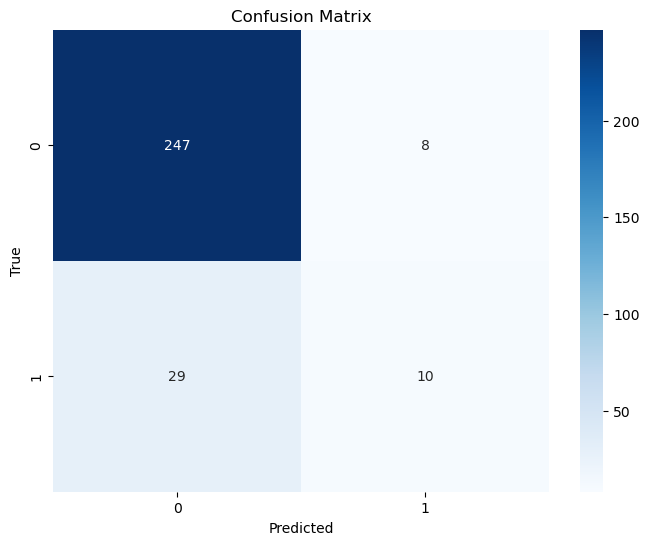

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels if needed
class_labels = [0, 1]  # Replace with your class labels

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000]
}

# Initialize GridSearchCV with the XGBoost model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator (model)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on your test data
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Test Accuracy: 0.8707482993197279


In [13]:
from sklearn.metrics import classification_report
# Evaluate the best model on your test data
y_pred = best_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.52      0.28      0.37        39

    accuracy                           0.87       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.85      0.87      0.85       294



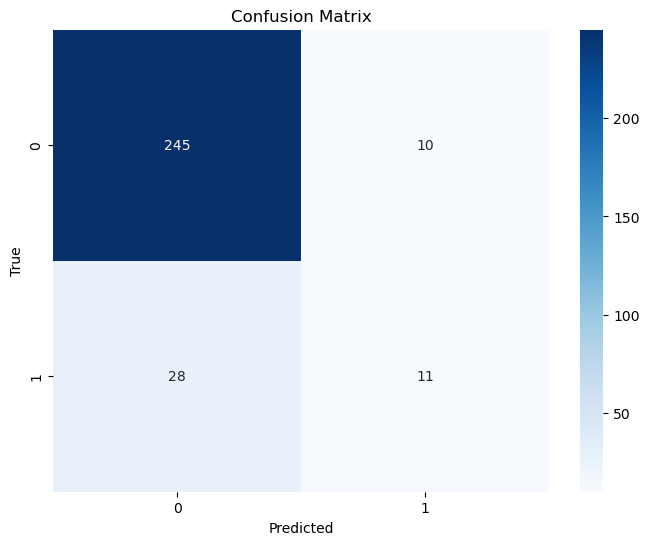

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels if needed
class_labels = [0, 1]  # Replace with your class labels

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()